In [1]:
import glob
import os
import pandas as pd
from utils import*
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan
sns.set()
%matplotlib inline

In [2]:
os.chdir('..')
cwd = os.getcwd()
files = glob.glob(cwd+'\\data\\*.csv')

In [3]:
cwd+'\\data'

'D:\\RSI\\icastro\\foci\\data'

In [4]:
file_array = []
for file in files:
    df_file = pd.read_csv(file)
    file_array.append(df_file)
data = pd.concat(file_array).drop(columns='Unnamed: 0').reset_index(drop=True)
del file_array

In [8]:
data.head()

index         x         y                file
0      0   1761.17   2096.82  28.1_BLEO_1000.txt
1      1   4198.74   7337.07  28.1_BLEO_1000.txt
2      2   5534.79   4744.20  28.1_BLEO_1000.txt
3      3  18381.00  12932.60  28.1_BLEO_1000.txt
4      4   3018.34   9004.14  28.1_BLEO_1000.txt

In [9]:
dist_files = data['file'].value_counts()

In [24]:
dummy_index = 0
df_points = data[data['file']==dist_files.index[dummy_index]].reset_index(drop=True)

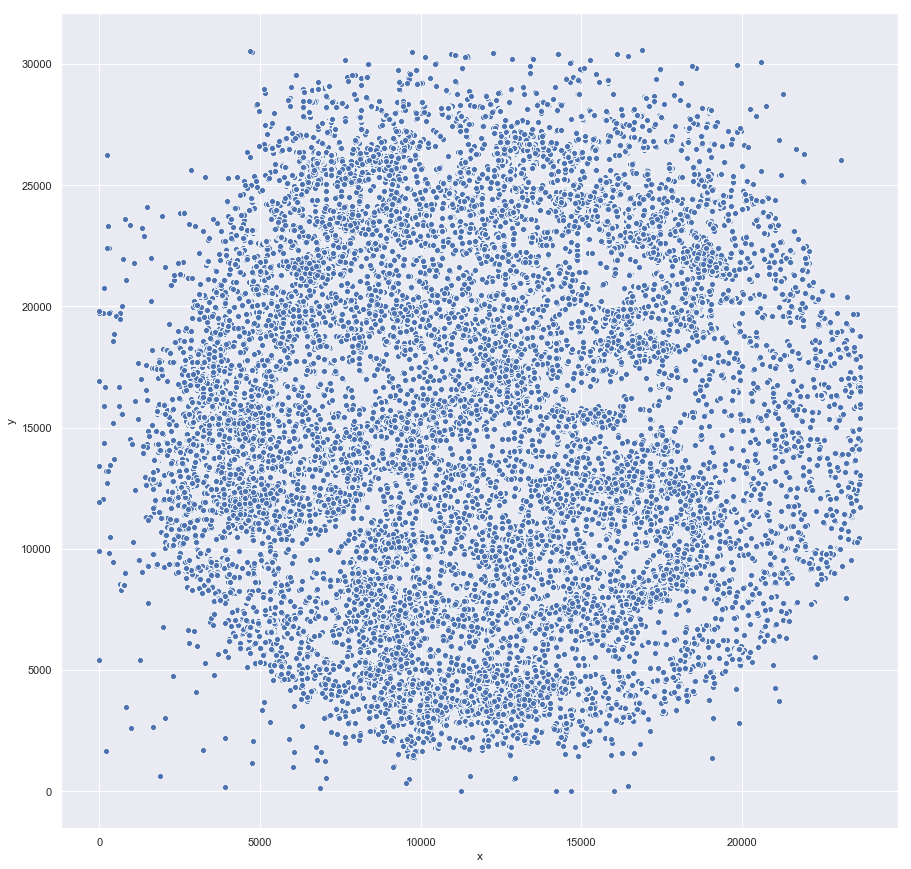

In [25]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points,x='x',y='y')

In [26]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=400)

In [27]:
clusterer.fit(df_points[['x','y']])

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_epsilon=0.0,
    cluster_selection_method='eom', core_dist_n_jobs=4,
    gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=400, min_samples=None, p=None,
    prediction_data=False)

In [28]:
clusterer.labels_

array([ 8, -1, 45, ...,  1, 26, -1], dtype=int64)

In [29]:
clusterer.labels_.max()

52

In [30]:
clusterer.probabilities_

array([1.        , 0.        , 0.98860137, ..., 1.        , 1.        ,
       0.        ])

In [31]:
thres = 0.75

In [32]:
df_points['clusters'] = clusterer.labels_
df_points['prob'] = clusterer.probabilities_
df_points['clusters_thres'] = [int(x) if x > thres else -1 for x in clusterer.probabilities_]

In [33]:
df_points.head()

index         x        y                    file  clusters      prob  \
0      0  17573.30  14234.5  29.1_BLEO_500_ST_3.txt         8  1.000000   
1      1   4806.63  17456.1  29.1_BLEO_500_ST_3.txt        -1  0.000000   
2      2  16953.10  22764.8  29.1_BLEO_500_ST_3.txt        45  0.988601   
3      3   9208.51  10059.3  29.1_BLEO_500_ST_3.txt         7  0.760618   
4      4   2461.95  13201.2  29.1_BLEO_500_ST_3.txt        -1  0.000000   

   clusters_thres  
0               1  
1              -1  
2               0  
3               0  
4              -1

In [34]:
df_points[df_points['clusters']!=-1].min()

index                                  0
x                                2105.54
y                                2837.15
file              29.1_BLEO_500_ST_3.txt
clusters                               0
prob                            0.174137
clusters_thres                        -1
dtype: object

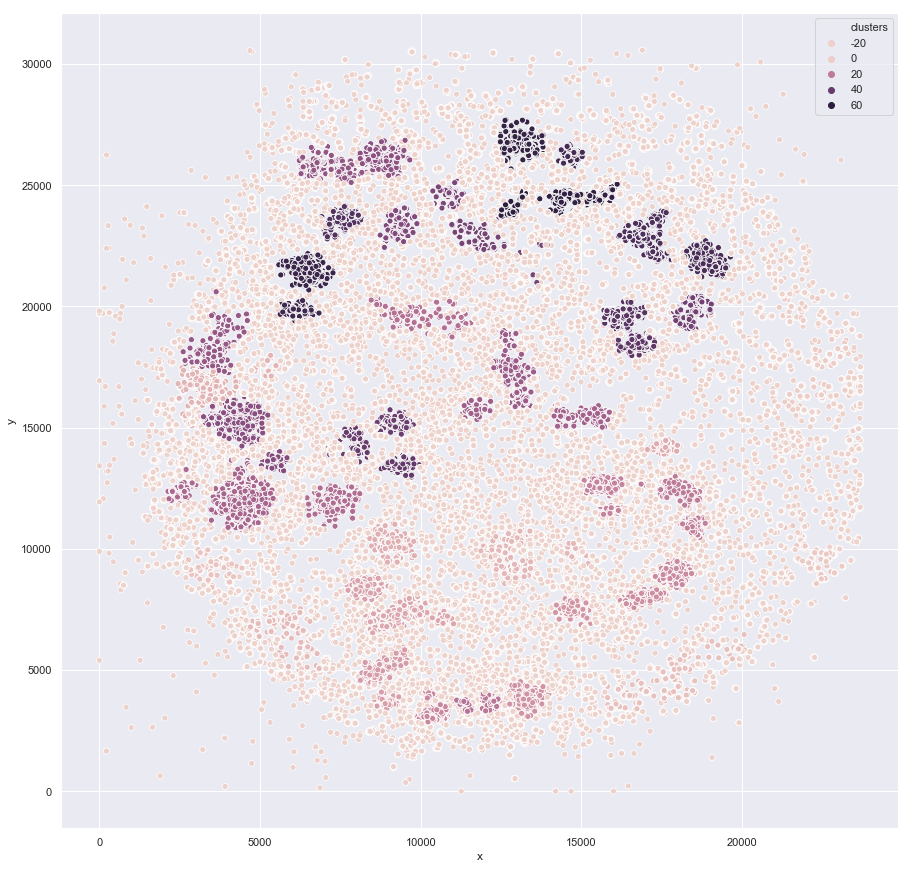

In [35]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points,x='x',y='y',hue='clusters')

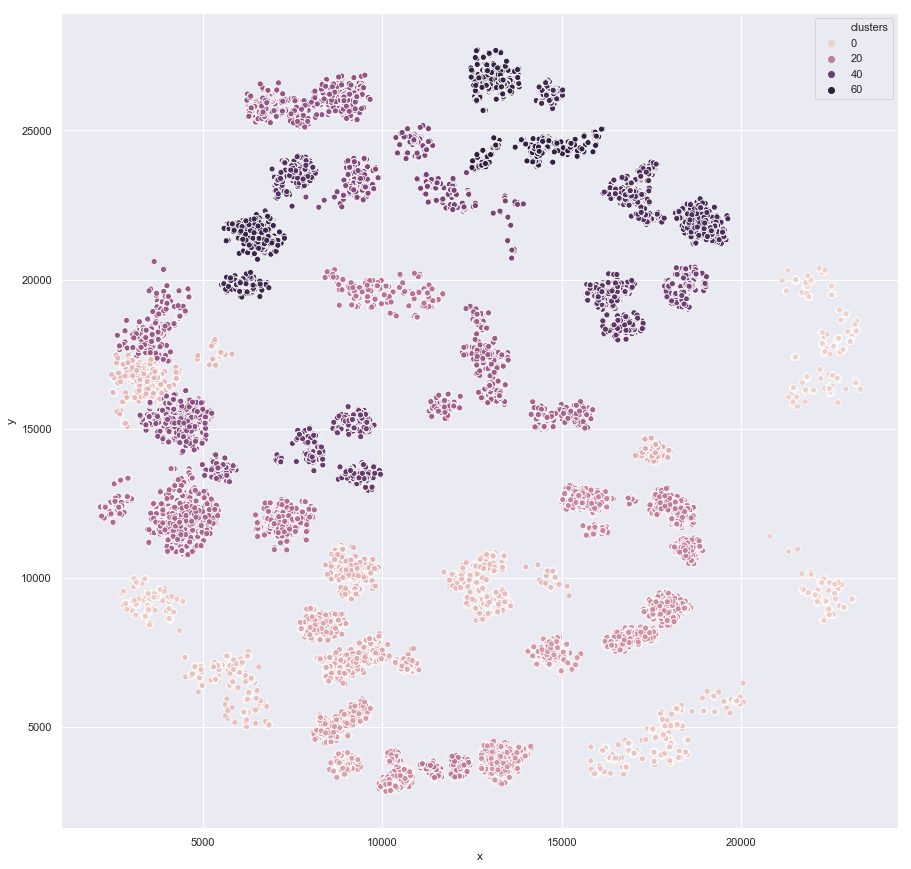

In [36]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points[df_points['clusters']!=-1],x='x',y='y',hue='clusters')

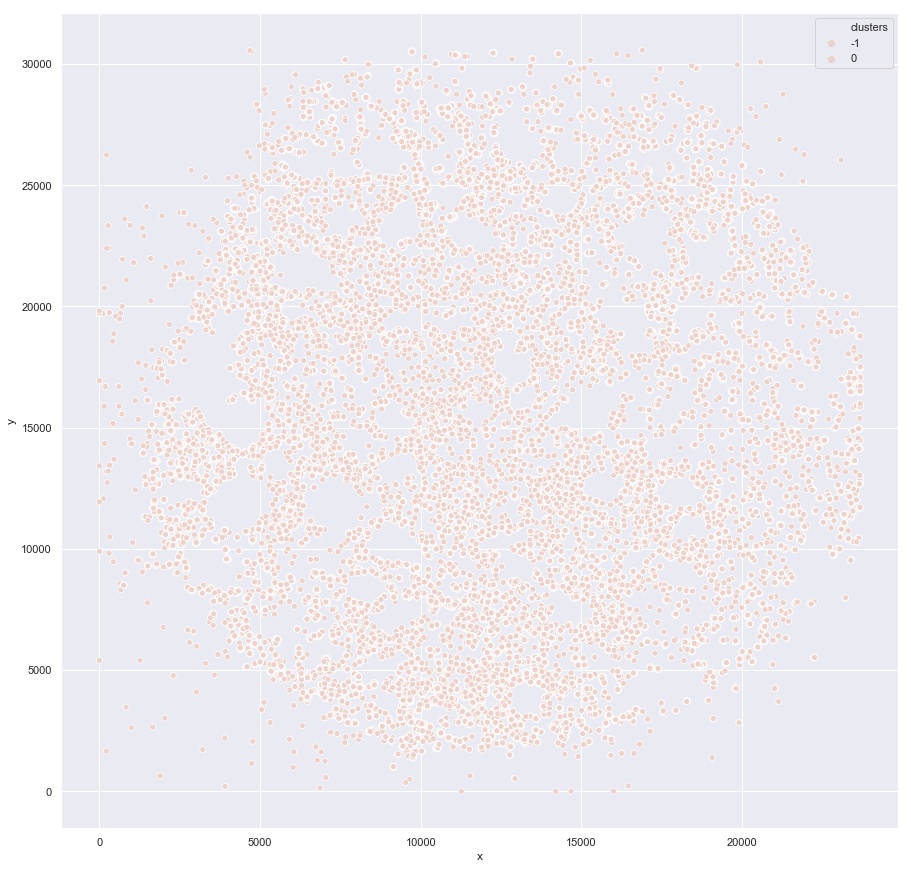

In [37]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points[df_points['clusters']==-1],x='x',y='y',hue='clusters')

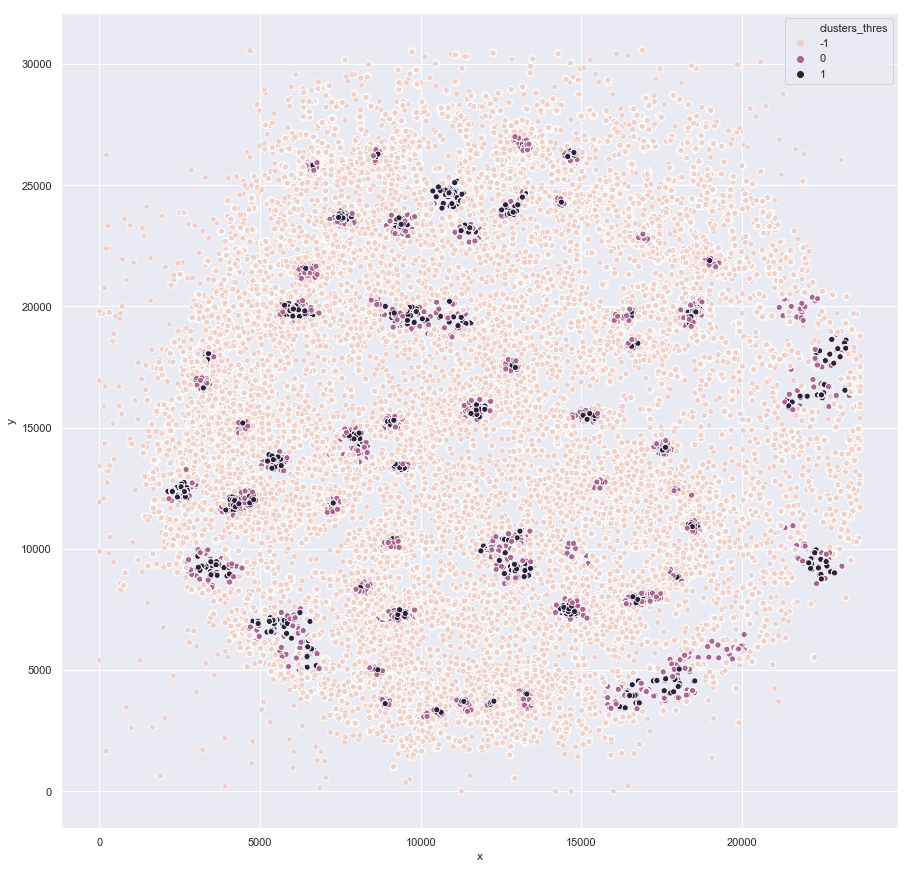

In [38]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points,x='x',y='y',hue='clusters_thres')

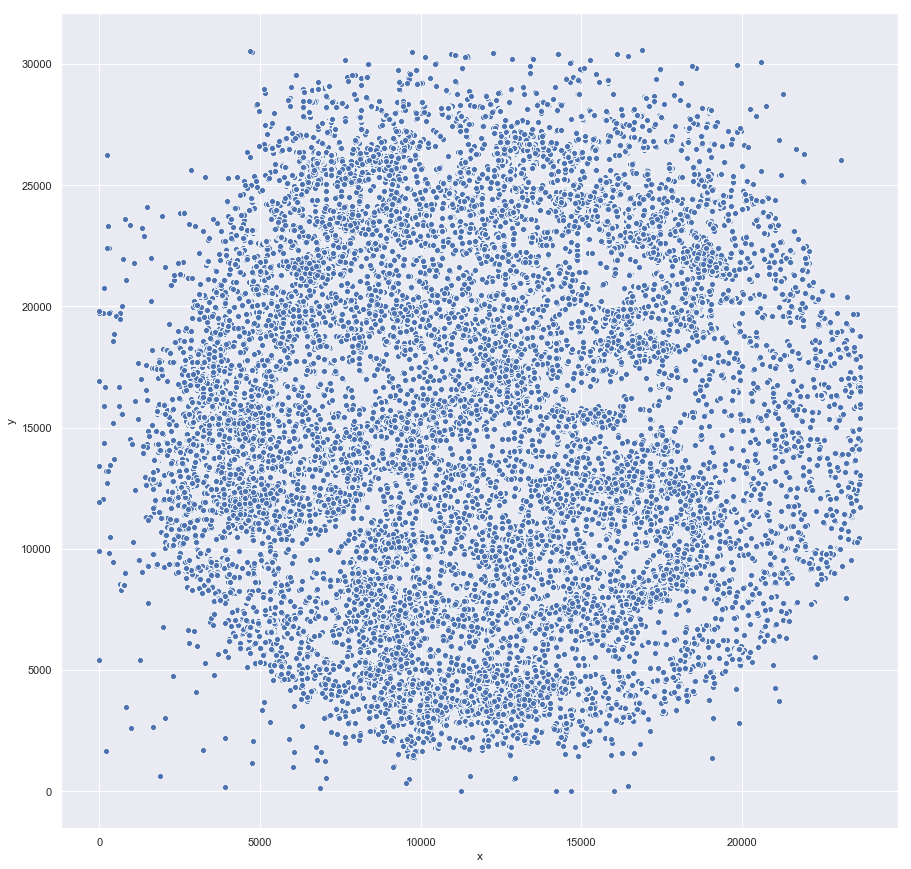

In [39]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_points,x='x',y='y')

In [40]:
# density factor alpha = 1

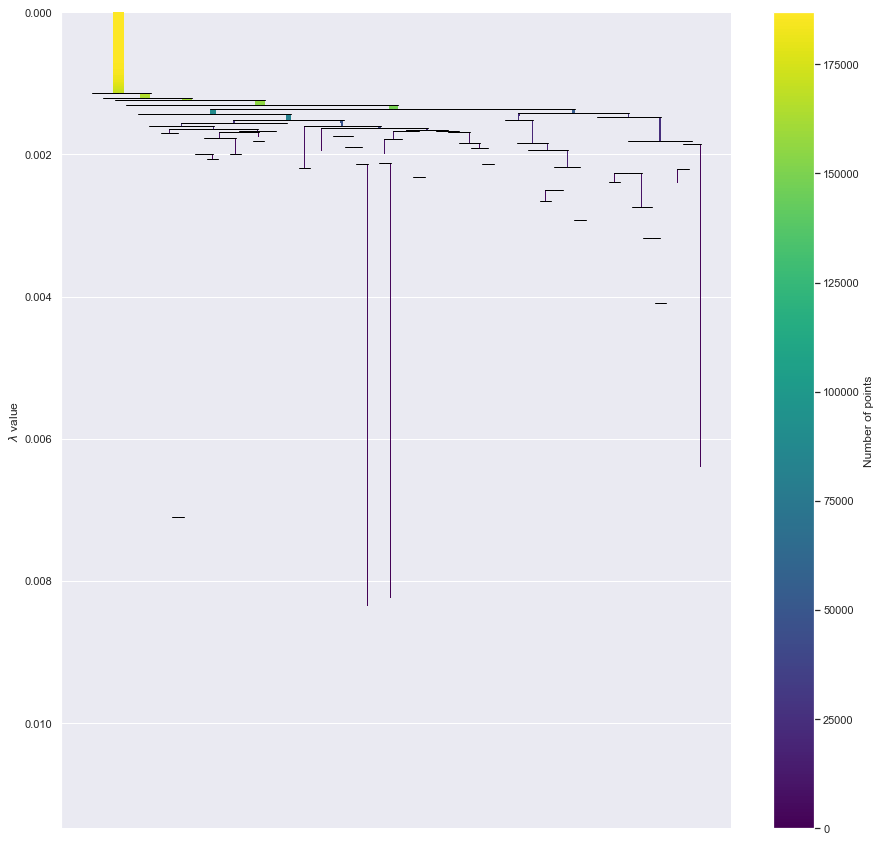

In [41]:
plt.figure(figsize=(15,15))
clusterer.condensed_tree_.plot()

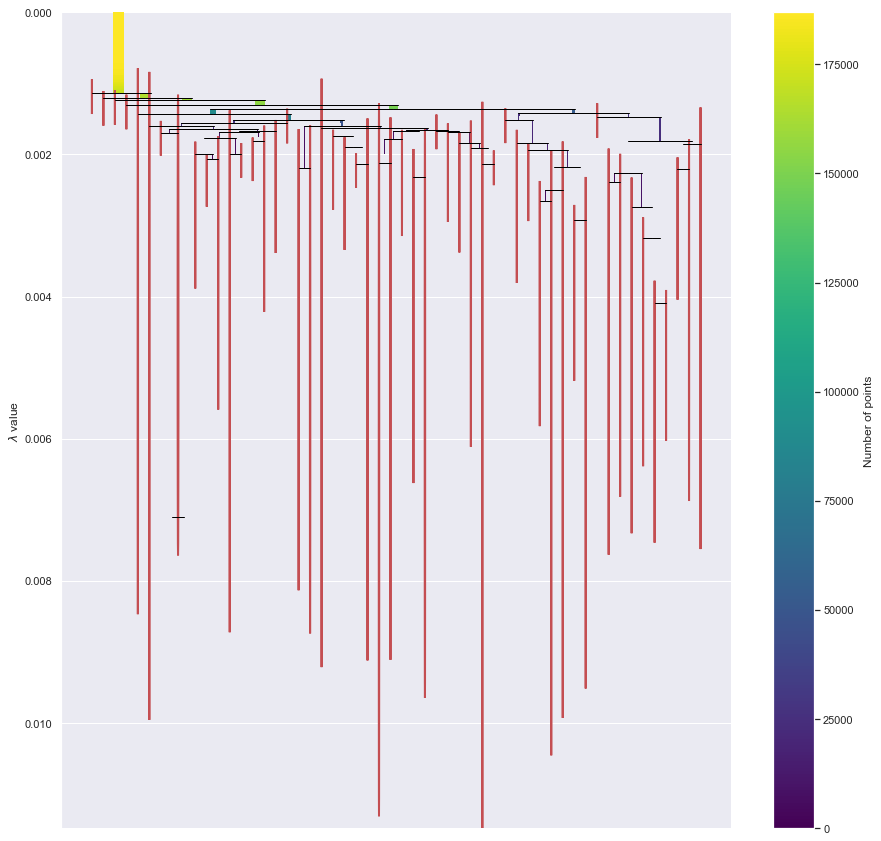

In [42]:
plt.figure(figsize=(15,15))
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [43]:
clusterer.condensed_tree_.to_pandas().head()

parent   child  lambda_val  child_size
0  186929  118521    0.000156           1
1  186929  179190    0.000171           1
2  186929  181274    0.000193           1
3  186929  132615    0.000196           1
4  186929  117162    0.000206           1